# Copie des images dans les repertoires d'entrainement, de validation et de test

In [ ]:
import os,shutil

original_dataset_dir = '/home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/PetImages'

base_dir = '/home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/cats_and_dogs_small'
#os.mkdir(base_dir)

#repertoir contenant les ensemble d'entrainement,validation et de test

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

"""os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)"""

#creation des sous repertoir pour les chiens et pour les chats

train_cats_dir = os.path.join(train_dir,'cats')
validation_cats_dir = os.path.join(validation_dir,'cats')
test_cats_dir = os.path.join(test_dir,'cats')

train_dogs_dir = os.path.join(train_dir,'dogs')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_dogs_dir = os.path.join(test_dir,'dogs')

"""os.mkdir(train_cats_dir)
os.mkdir(test_cats_dir)
os.mkdir(validation_cats_dir)

os.mkdir(train_dogs_dir)
os.mkdir(test_dogs_dir)
os.mkdir(validation_dogs_dir)"""

In [ ]:
#regardons le nombre d'element dnas chaque dossier

print(f"il y'a {len(os.listdir(original_dataset_dir+"/Cat"))} d'images de chats")
print(f"il y'a {len(os.listdir(original_dataset_dir+"/Dog"))} d'images de chiens")

il y'a 12491 d'images de chats
il y'a 12470 d'images de chiens


Dans ce jeu de données, on constate qu'il y'a environ 12,5k d'images, mais ici, comme je vais utiliser un resau de convolution et que je n'ai pas asser de ressource je vais me liiter a l'utilisation de 3000 images.

1500 pour *train* , 750 pour *validation* et 750 pour *test*

In [22]:
#copie des 1500 images d'entrainement

#chats
fnames = ['Cat.{}.jpg'.format(i) for i in range(1500)]
fnames_base = ['Cat/{}.jpg'.format(i) for i in range(1500)]

for i in range(1500):
    src = os.path.join(original_dataset_dir,fnames_base[i])
    dst = os.path.join(train_cats_dir,fnames[i])
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f"le fichier {src} n'existe pas")

#chiens
fnames = ['Dog.{}.jpg'.format(i) for i in range(1500)]
fnames_base = ['Dog/{}.jpg'.format(i) for i in range(1500)]

for i in range(1500):
    src = os.path.join(original_dataset_dir,fnames_base[i])
    dst = os.path.join(train_dogs_dir,fnames[i])
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f"le fichier {src} n'existe pas")

#copie des 750 images de validation

#chats
fnames = ['Cat.{}.jpg'.format(i) for i in range(1500,2250)]
fnames_base = ['Cat/{}.jpg'.format(i) for i in range(1500,2250)]

for i in range(750):
    src = os.path.join(original_dataset_dir,fnames_base[i])
    dst = os.path.join(validation_cats_dir,fnames[i])
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f"le fichier {src} n'existe pas")

#chiens
fnames = ['Dog.{}.jpg'.format(i) for i in range(1500,2250)]
fnames_base = ['Dog/{}.jpg'.format(i) for i in range(1500,2250)]

for i in range(750):
    src = os.path.join(original_dataset_dir,fnames_base[i])
    dst = os.path.join(validation_dogs_dir,fnames[i])
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f"le fichier {src} n'existe pas")

#copie des 750 images de test

#chats
fnames = ['Cat.{}.jpg'.format(i) for i in range(1500,2250)]
fnames_base = ['Cat/{}.jpg'.format(i) for i in range(1500,2250)]

for i in range(750):
    src = os.path.join(original_dataset_dir,fnames_base[i])
    dst = os.path.join(test_cats_dir,fnames[i])
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f"le fichier {src} n'existe pas")

#chiens
fnames = ['Dog.{}.jpg'.format(i) for i in range(1500,2250)]
fnames_base = ['Dog/{}.jpg'.format(i) for i in range(1500,2250)]

for i in range(750):
    src = os.path.join(original_dataset_dir,fnames_base[i])
    dst = os.path.join(test_dogs_dir,fnames[i])
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f"le fichier {src} n'existe pas")

le fichier /home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/PetImages/Cat/666.jpg n'existe pas
le fichier /home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/PetImages/Cat/835.jpg n'existe pas
le fichier /home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/PetImages/Dog/495.jpg n'existe pas
le fichier /home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/PetImages/Dog/1043.jpg n'existe pas
le fichier /home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/PetImages/Dog/1174.jpg n'existe pas
le fichier /home/tchinda/Python_env_code/venv/francois_cholet_ml/vision_par_ordi/PetImages/Dog/1259.jpg n'existe pas


In [24]:
print(f"il y'a {len(os.listdir(train_cats_dir))} images d'entrainement de chats")
print(f"il y'a {len(os.listdir(train_dogs_dir))} images d'entrainement de chiens")

il y'a 1498 images d'entrainement de chats
il y'a 1496 images d'entrainement de chiens


### Creation de l'architecture du réseau

In [38]:
from keras import models,layers

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Pretraitement des données

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#normalisation des images
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(#train_dir est le repertoir contenant les data training
    train_dir,
    #target_size modifie la dimensions des images afin qu'elles mesurent 150*150 pixels
    target_size =(150,150),
    batch_size = 20,
    #nous avons besoin de label binaire car on utilise la fonction de perte binary_crossentropy
    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(#train_dir est le repertoir contenant les data training
    validation_dir,
    target_size =(150,150),
    batch_size = 20,
    class_mode = 'binary')


Found 2994 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


configuration du genrateur avec un generateur de lots

In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dog_small_1.h5')

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - acc: 0.8959 - loss: 0.2803 - val_acc: 0.7450 - val_loss: 0.5102
Epoch 2/30
 50/100 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - acc: 0.8693 - loss: 0.3092

/home/tchinda/Python_env_code/venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - acc: 0.8718 - loss: 0.3037 - val_acc: 0.7450 - val_loss: 0.5270
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - acc: 0.8966 - loss: 0.2752 - val_acc: 0.7640 - val_loss: 0.5191
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - acc: 0.8957 - loss: 0.2715 - val_acc: 0.7600 - val_loss: 0.5291
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 305ms/step - acc: 0.8963 - loss: 0.2663 - val_acc: 0.7610 - val_loss: 0.5529
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - acc: 0.9071 - loss: 0.2462 - val_acc: 0.7950 - val_loss: 0.4822
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - acc: 0.9126 - loss: 0.2306 - val_acc: 0.7560 - val_loss: 0.5434
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - acc: 0.9170 - loss: 0.2184 - val_acc: 0.7720 - val_loss: 0.5020
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - acc: 0.9258 - loss: 0.1974 - val_acc: 0.7710 - val_loss: 0.5170
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17

/tmp/ipykernel_10045/2470716216.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,acc,'bo',label='entrainement',color = 'green')


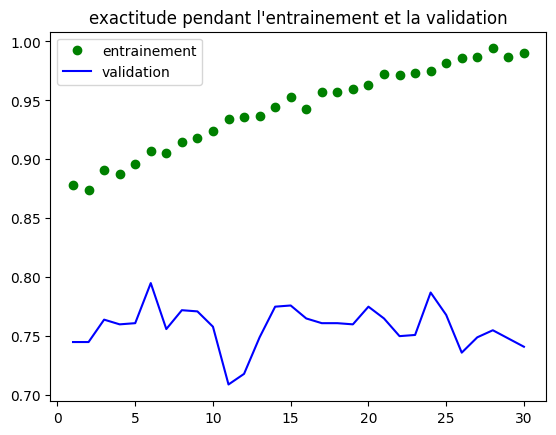

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='entrainement',color = 'green')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title("exactitude pendant l'entrainement et la validation")
plt.legend()
plt.show()

/tmp/ipykernel_10045/2450984772.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,loss,'bo',label='entrainement',color = 'red')


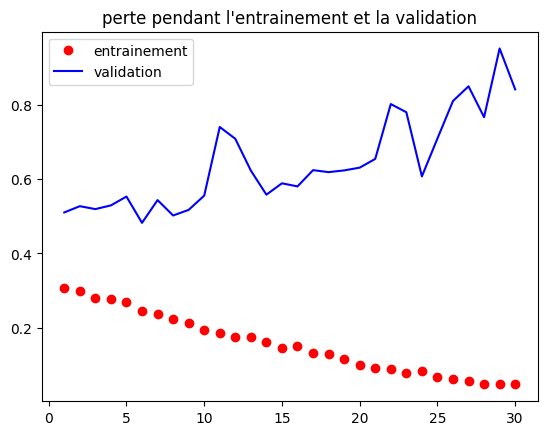

In [48]:
plt.plot(epochs,loss,'bo',label='entrainement',color = 'red')
plt.plot(epochs,val_loss,'b',label='validation')
plt.title("perte pendant l'entrainement et la validation")
plt.legend()
plt.show()